In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler

In [2]:

df = pd.read_excel("CreditWorthiness.xlsx")

In [3]:
df.sample(2)

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
904,0 <= Rs. < 2000,6,all settled till now,renovation,4420,Rs. < 1000,less than 1 year,3,married or widowed male,no one,...,life insurance/building society,22,none,own,1,resident unskilled,1,no,no,good
786,no checking account,18,all settled till now,second hand vehicle,67490,no savings account,1 to 4 years,2,single male,no one,...,Other cars etc.,68,none,pays rent,2,employee with official position,1,no,no,bad


In [4]:
# # df.isnull().sum()
# df.duplicated().sum()
# df.shape

In [5]:
# a = df.describe().columns
# a
# df.shape
# from sklearn.preprocessing import StandardScaler
# sd = StandardScaler()



In [6]:
y = df['creditScore']

In [7]:
le=LabelEncoder()
df['Prop'] = le.fit_transform(df[['Prop']])
le2=LabelEncoder()
df['inPlans'] = le2.fit_transform(df[['inPlans']])
le3 = LabelEncoder()
df['JobType'] = le3.fit_transform(df[['JobType']])
le4 = LabelEncoder()
df['foreign'] = le4.fit_transform(df[['foreign']])
le5 = LabelEncoder()
df['telephone'] = le5.fit_transform(df[['telephone']])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataC

In [8]:
trf1 = ColumnTransformer(transformers=[
    ('Cbal',OrdinalEncoder(categories=[['no checking account',' Rs. < 0','0 <= Rs. < 2000','Rs. >=2000']]),['Cbal']),
    ('chist',OrdinalEncoder(categories=[['all settled till now','dues not paid earlier','all settled','none taken/all settled']]),['Chist']),
    ('edur',OrdinalEncoder(categories=[['1 to 4 years','more than 7 years','4 to 7 years','less than 1 year','not employed']]),['Edur']),
    ('msg',OrdinalEncoder(categories=[['single male','divorced or separated or married female','married or widowed male','divorced or separated male']]),['MSG']),
    ('Rdur', OrdinalEncoder(categories=[['more than 3 years','1 to 2 years','2 to 3 years','less than a year']]),['Rdur']),
    ('htype',OrdinalEncoder(categories=[['own','pays rent','free']]),['Htype']),
    ('cust',StandardScaler(),['Camt'])
],remainder='passthrough')


In [9]:
a =['Cbal', 'Cdur', 'Chist', 'Camt', 'Edur', 'InRate', 'MSG', 'Rdur',
       'Prop', 'age', 'inPlans', 'Htype', 'NumCred', 'JobType', 'Ndepend',
       'telephone', 'foreign']

In [10]:
df = df[a]

In [11]:
df.sample()

,Cbal,Cdur,Chist,Camt,Edur,InRate,MSG,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign
116,Rs. < 0,12,all settled till now,25650,1 to 4 years,2,divorced or separated male,less than a year,0,42,1,own,1,1,1,0,0


In [12]:
new_df = trf1.fit_transform(df)

In [13]:
new_df.shape

(1000, 17)

In [14]:
new_df = pd.DataFrame(new_df,columns=a)

In [15]:
sd = StandardScaler()
new_df = sd.fit_transform(new_df)

In [16]:
df1 = pd.DataFrame(new_df,columns=a)

In [17]:
df1.isnull().sum()

Cbal         0
Cdur         0
Chist        0
Camt         0
Edur         0
InRate       0
MSG          0
Rdur         0
Prop         0
age          0
inPlans      0
Htype        0
NumCred      0
JobType      0
Ndepend      0
telephone    0
foreign      0
dtype: int64

In [18]:
new_df = df1

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

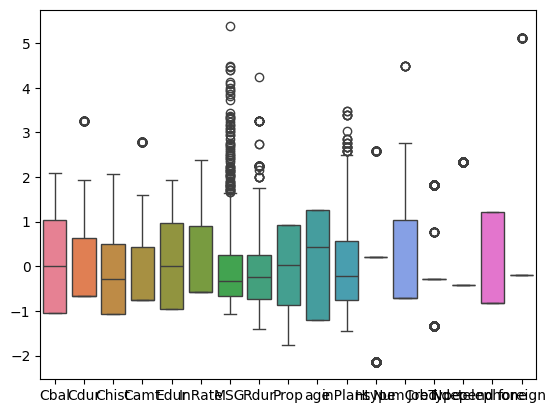

In [20]:
sns.boxplot(new_df)
plt.show()

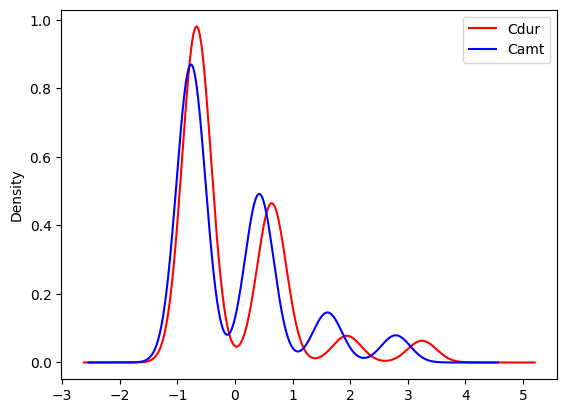

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

new_df['Cdur'].plot(kind='kde',ax=ax,color= 'red')
new_df['Camt'].plot(kind='kde',ax = ax,color='blue')

line ,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc='best')
plt.show()

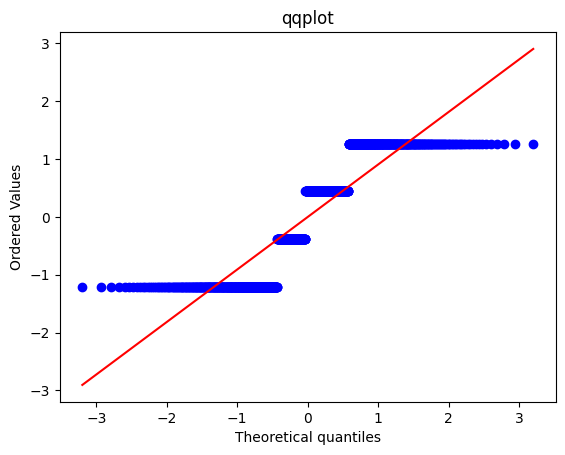

In [22]:
import scipy.stats as stats

stats.probplot(new_df['age'],dist='norm',plot=plt)
plt.title("qqplot")
plt.show()

In [23]:
new_df['Camt'].skew()

1.2483879773859714

In [24]:
new_df['Cdur'].skew()

1.622745900526287

In [25]:
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# ft = PowerTransformer()
# new_df['Camt'] = ft.fit_transform(new_df[['Camt']])
# new_df['Cdur'] = ft.fit_transform(new_df[['Cdur']])

In [26]:
cols = new_df.columns

In [27]:
pipe = ColumnTransformer([('ft',PowerTransformer(),a)],remainder='passthrough')

In [28]:
new_df = pipe.fit_transform(new_df)

In [29]:
new_df = pd.DataFrame(new_df,columns=a)

In [30]:
new_df['age'].skew()

0.0071960576225714125

In [31]:
new_df.isnull().sum()

Cbal         0
Cdur         0
Chist        0
Camt         0
Edur         0
InRate       0
MSG          0
Rdur         0
Prop         0
age          0
inPlans      0
Htype        0
NumCred      0
JobType      0
Ndepend      0
telephone    0
foreign      0
dtype: int64

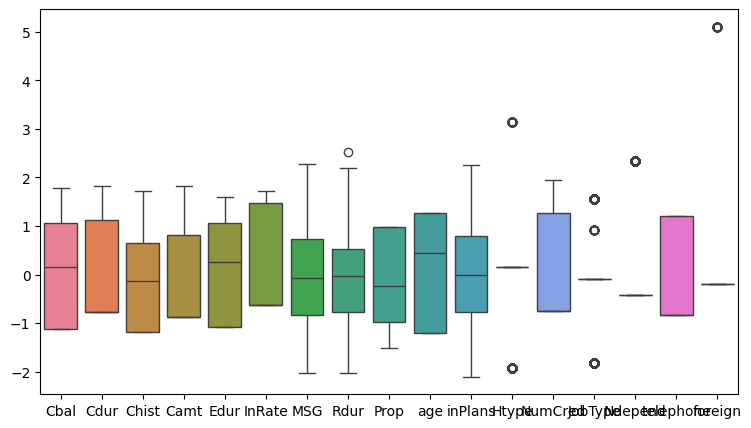

In [32]:
plt.figure(figsize=(9,5))
sns.boxplot(new_df)
plt.show()

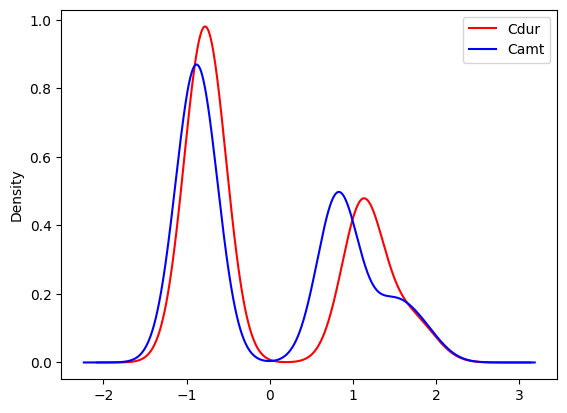

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

new_df['Cdur'].plot(kind='kde',ax=ax,color= 'red')
new_df['Camt'].plot(kind='kde',ax = ax,color='blue')

line ,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc='best')
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [35]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [36]:
models = [RandomForestClassifier(),GradientBoostingClassifier(),LogisticRegression(),XGBClassifier(n_estimators=40),AdaBoostClassifier()]

In [37]:
len(new_df.columns)

17

In [38]:
from sklearn.decomposition import PCA
pc = PCA(n_components=17)
x = pc.fit_transform(new_df)

In [39]:
for model in models:
    print(model,end=": ")
    print(np.mean(cross_val_score(model,new_df,y_transformed,cv=5)))

RandomForestClassifier(): 0.747
GradientBoostingClassifier(): 0.764
LogisticRegression(): 0.6970000000000001
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 0.754
AdaBoostClassifier(): 

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

0.726


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [40]:
def remove_outlier(col):
    x2 = new_df[col].quantile(0.75)
    x1 = new_df[col].quantile(0.25)
    iqr = x2-x1
    lower = x1-(1.5*iqr)
    upper = x2+(1.5*iqr)
    new_df[col] = np.where(new_df[col]>upper,upper,np.where(new_df[col]<lower,lower,new_df[col]))

In [41]:
# remove_outlier('age')
# remove_outlier('NumCred')
# remove_outlier('Ndepend')
# remove_outlier('Camt')
# remove_outlier('Htype')
# remove_outlier("JobType")
# remove_outlier('Rdur')
# remove_outlier('foreign')

In [42]:
new_df.isnull().sum()

Cbal         0
Cdur         0
Chist        0
Camt         0
Edur         0
InRate       0
MSG          0
Rdur         0
Prop         0
age          0
inPlans      0
Htype        0
NumCred      0
JobType      0
Ndepend      0
telephone    0
foreign      0
dtype: int64

In [43]:
new_df.sample()

,Cbal,Cdur,Chist,Camt,Edur,InRate,MSG,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign
769,1.060613,-0.776482,-1.182946,-0.879519,-1.078873,1.722464,1.371419,1.774873,0.982681,-0.3864,0.482371,0.147765,-0.758337,-0.09965,2.334869,1.214598,-0.196014


In [61]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('rd',GradientBoostingClassifier()),('rf',RandomForestClassifier()),('ad',XGBClassifier())],voting='soft')

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_df,y,test_size=0.2,random_state=42)

In [62]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('rd', GradientBoostingClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('ad',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,vc.predict(x_test))

0.8

In [45]:
np.mean(cross_val_score(vc,new_df,y_transformed,cv=5))

0.771

In [46]:
from sklearn.svm import SVC

In [47]:
from sklearn.ensemble import StackingClassifier
st = StackingClassifier(estimators=[('rd',GradientBoostingClassifier()),('rf',RandomForestClassifier()),('ad',XGBClassifier())],final_estimator=SVC())

In [48]:
np.mean(cross_val_score(st,new_df,y_transformed,cv=5))

0.756